This is a notebook designed to plot frequency distributions of atmospheric properties across ensemble members. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
#https://community.c3.ai/t/creating-custom-units/976 will help with unit conversions.

In [2]:
bcacc_metric = c3.SimpleMetric(id = "AverageMassBCacc_SimulationSample",
                            name = "AverageMassBCacc_SimulationSample",
                            description = "Calculates average of massBCacc for a given SimulationSample",
                            srcType = "SimulationSample",
                            path = "output",  # the timeseries is in the output field of SimSam
                            expression = "avg(normalized.data.mass_BC_acc)"
                           )
lon_metric = c3.SimpleMetric(id = "AverageLon_SimulationSample",
                            name = "AverageLon_SimulationSample",
                            description = "Calculates average of longitude for a given SimulationSample",
                            srcType = "SimulationSample",
                            path = "output",  # the timeseries is in the output field of SimSam
                            expression = "avg(normalized.data.longitude)"
                           )
lat_metric = c3.SimpleMetric(id = "AverageLat_SimulationSample",
                            name = "AverageLat_SimulationSample",
                            description = "Calculates average of latitude for a given SimulationSample",
                            srcType = "SimulationSample",
                            path = "output",  # the timeseries is in the output field of SimSam
                            expression = "avg(normalized.data.latitude)"
                           )
alt_metric = c3.SimpleMetric(id = "AverageAlt_SimulationSample",
                            name = "AverageAlt_SimulationSample",
                            description = "Calculates average of altitude for a given SimulationSample",
                            srcType = "SimulationSample",
                            path = "output",  # the timeseries is in the output field of SimSam
                            expression = "avg(normalized.data.altitude)"
                           )

In [3]:
#fetch by default will only give you the first 500 rows, with more rows, need fetch(limit=-1) or similar
csv_table_metric = c3.SimulationModelParameters.fetch().objs.toJson()
#objs returns a plain python array
#csv_table_metric = c3.SimulationModelParameters.fetch().objs.toPandas()
dfparams = pd.DataFrame(csv_table_metric)
print(dfparams.head())
#print(csv_table_metric.head())

                        type                 id  \
0  SimulationModelParameters    EnsNo_1_SimNo_0   
1  SimulationModelParameters    EnsNo_1_SimNo_1   
2  SimulationModelParameters   EnsNo_1_SimNo_10   
3  SimulationModelParameters  EnsNo_1_SimNo_100   
4  SimulationModelParameters  EnsNo_1_SimNo_101   

                                                meta  version  \
0  {'type': 'Meta', 'tenantTagId': 151, 'tenant':...        1   
1  {'type': 'Meta', 'tenantTagId': 151, 'tenant':...        1   
2  {'type': 'Meta', 'tenantTagId': 151, 'tenant':...        1   
3  {'type': 'Meta', 'tenantTagId': 151, 'tenant':...        1   
4  {'type': 'Meta', 'tenantTagId': 151, 'tenant':...        1   

                                    ensemble  acure_bl_nuc  acure_ait_width  \
0  {'type': 'SimulationEnsemble', 'id': '1'}      0.500000         0.650000   
1  {'type': 'SimulationEnsemble', 'id': '1'}      0.470000         0.500000   
2  {'type': 'SimulationEnsemble', 'id': '1'}      0.969888       

In [4]:
ens_results=[]
for ensMem in range(0,221):
    ensID = "EnsNo_1_SimNo_"+str(ensMem)
    my_spec = c3.EvalMetricsSpec(
            ids = [ensID],
            expressions = ["AverageMassBCacc_SimulationSample"],
            start = "2017-08-18T08:00:00.000",
            end = "2017-08-18T14:00:00.000",
            interval = "MINUTE" 
            )
    evalMetricsResult = c3.SimulationSample.evalMetricsWithMetadata(
                                                                spec=my_spec,
                                                                overrideMetrics=[bcacc_metric]#
                                                                )
    #insert something about getting csv table parameters out here....
    df = c3.EvalMetricsResult.toPandas(result=evalMetricsResult)
    if ensMem==0:
        print(np.array(df['AverageMassBCacc_SimulationSample']).shape)
    ens_results.append(np.array(df['AverageMassBCacc_SimulationSample'])[0])
    if ensMem%10==0:
        print(ensID)
    

(360,)
EnsNo_1_SimNo_0
EnsNo_1_SimNo_10
EnsNo_1_SimNo_20
EnsNo_1_SimNo_30
EnsNo_1_SimNo_40
EnsNo_1_SimNo_50
EnsNo_1_SimNo_60
EnsNo_1_SimNo_70
EnsNo_1_SimNo_80
EnsNo_1_SimNo_90
EnsNo_1_SimNo_100
EnsNo_1_SimNo_110
EnsNo_1_SimNo_120
EnsNo_1_SimNo_130
EnsNo_1_SimNo_140
EnsNo_1_SimNo_150
EnsNo_1_SimNo_160
EnsNo_1_SimNo_170
EnsNo_1_SimNo_180
EnsNo_1_SimNo_190
EnsNo_1_SimNo_200
EnsNo_1_SimNo_210
EnsNo_1_SimNo_220


## Detour: alternative to the cell above ^ -- Bruno

Instead of reconstructing the SimulationSample ID, we can fetch it, avoiding having a definite range from 0 to 221 (one may not know how many samples are there):

In [15]:
ens_results=[]

samples = c3.SimulationSample.fetch().objs      # this fetches the type and grabs the objects 
ensMem=0
for sample in samples:
    ensID = sample.id
    my_spec = c3.EvalMetricsSpec(
            ids = [ensID],
            expressions = ["AverageMassBCacc_SimulationSample"],
            start = "2017-08-18T10:00:00.000",
            end = "2017-08-18T16:00:00.000",
            interval = "MINUTE" 
            )
    evalMetricsResult = c3.SimulationSample.evalMetricsWithMetadata(
                                                                spec=my_spec,
                                                                overrideMetrics=[bcacc_metric]
                                                                )
    
    df = c3.EvalMetricsResult.toPandas(result=evalMetricsResult)
    if ensMem==0:
        print(np.array(df['AverageMassBCacc_SimulationSample']).shape)
    ens_results.append(np.array(df['AverageMassBCacc_SimulationSample']))
    if ensMem%10==0:
        print(ensID)
    ensMem+=1

(360,)
EnsNo_1_SimNo_0
EnsNo_1_SimNo_107
EnsNo_1_SimNo_116
EnsNo_1_SimNo_125
EnsNo_1_SimNo_134
EnsNo_1_SimNo_143
EnsNo_1_SimNo_152
EnsNo_1_SimNo_161
EnsNo_1_SimNo_170
EnsNo_1_SimNo_18
EnsNo_1_SimNo_189
EnsNo_1_SimNo_198
EnsNo_1_SimNo_206
EnsNo_1_SimNo_215
EnsNo_1_SimNo_26
EnsNo_1_SimNo_35
EnsNo_1_SimNo_44
EnsNo_1_SimNo_53
EnsNo_1_SimNo_62
EnsNo_1_SimNo_71
EnsNo_1_SimNo_80
EnsNo_1_SimNo_9
EnsNo_1_SimNo_99


## Brack on track!

In [5]:
my_spatial_spec = c3.EvalMetricsSpec(
            ids = ["EnsNo_1_SimNo_0"],
            expressions = ["AverageAlt_SimulationSample","AverageLat_SimulationSample","AverageLon_SimulationSample"],
            start = "2017-08-18T10:00:00.000",
            end = "2017-08-18T16:00:00.000",
            interval = "MINUTE" 
            )
evalMetricsResult = c3.SimulationSample.evalMetricsWithMetadata(
                                                                spec=my_spatial_spec,
                                                                overrideMetrics=[alt_metric,lat_metric,lon_metric]#
                                                                )
    
df = c3.EvalMetricsResult.toPandas(result=evalMetricsResult)
avgAlt = np.array(df['AverageAlt_SimulationSample'])
print(np.array(df['AverageAlt_SimulationSample'])[0])

0.0


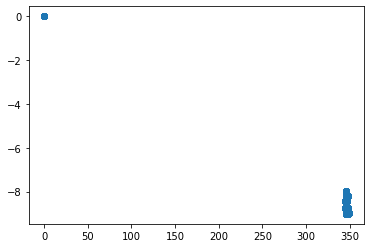

In [6]:
#plt.plot(range(0,360),avgAlt)
plt.subplot(111)#,projection=ccrs.PlateCarree())
plt.scatter(df['AverageLon_SimulationSample'],df['AverageLat_SimulationSample'])
#plt.gca().coastlines()

(221, 360)
[0.00000000e+00 6.66666667e-12 1.33333333e-11 2.00000000e-11
 2.66666667e-11 3.33333333e-11 4.00000000e-11 4.66666667e-11
 5.33333333e-11 6.00000000e-11 6.66666667e-11 7.33333333e-11
 8.00000000e-11 8.66666667e-11 9.33333333e-11 1.00000000e-10
 1.06666667e-10 1.13333333e-10 1.20000000e-10 1.26666667e-10
 1.33333333e-10 1.40000000e-10 1.46666667e-10 1.53333333e-10
 1.60000000e-10 1.66666667e-10 1.73333333e-10 1.80000000e-10
 1.86666667e-10 1.93333333e-10 2.00000000e-10]


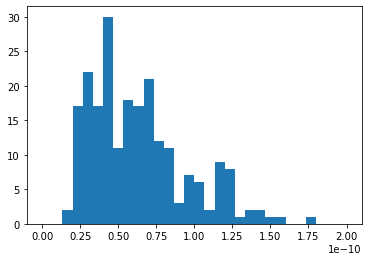

In [18]:
print(np.array(ens_results).shape)
hist_array,bins,patches=plt.hist(np.array(ens_results)[:,240],bins=30,range=(0,2e-10))

print(bins)


(30,)
[0.00000000e+00 6.66666667e-12 1.33333333e-11 2.00000000e-11
 2.66666667e-11 3.33333333e-11 4.00000000e-11 4.66666667e-11
 5.33333333e-11 6.00000000e-11 6.66666667e-11 7.33333333e-11
 8.00000000e-11 8.66666667e-11 9.33333333e-11 1.00000000e-10
 1.06666667e-10 1.13333333e-10 1.20000000e-10 1.26666667e-10
 1.33333333e-10 1.40000000e-10 1.46666667e-10 1.53333333e-10
 1.60000000e-10 1.66666667e-10 1.73333333e-10 1.80000000e-10
 1.86666667e-10 1.93333333e-10 2.00000000e-10]
221.0 (360, 30)


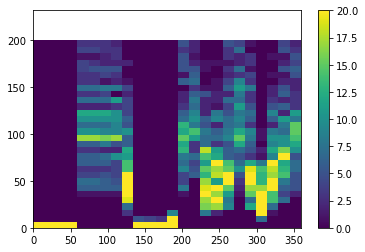

In [19]:
histograms=[]
for i in range(0,360):
    hist_array,bins,patches=plt.hist(np.array(ens_results)[:,i],30,range=(0,2e-10))
    if i==0:
        print(hist_array.shape)
    histograms.append(hist_array)
print(bins)
hists = np.array(histograms)
print(np.max(hists),hists.shape)
#totally don't understand why I have to scale this up so that the max of the y axis is 200, not 2e-10
plt.pcolormesh(range(0,361), 1e12*np.array(bins),hists.T,vmax=20)
plt.colorbar()
plt.show()

In [20]:
bcaccObs_metric = c3.SimpleMetric(id = "AverageMassBCacc_ObservationSet",
                            name = "AverageMassBCacc_ObservationSet",
                            description = "Calculates average of massBCacc for a given ObservationSet",
                            srcType = "ObservationSet",
                            path = "output",  
                            expression = "avg(normalized.data.total_BC)"
                           )
tempObs_metric = c3.SimpleMetric(id = "AverageTemperature_ObservationSet",
                            name = "AverageTemperature_ObservationSet",
                            description = "Calculates average of temperature for a given ObservationSet",
                            srcType = "ObservationSet",
                            path = "output",  
                            expression = "avg(normalized.data.temperature)"
                           )
pressObs_metric = c3.SimpleMetric(id = "AveragePressure_ObservationSet",
                            name = "AveragePressure_ObservationSet",
                            description = "Calculates average of pressure for a given ObservationSet",
                            srcType = "ObservationSet",
                            path = "output",  
                            expression = "avg(normalized.data.pressure)"
                           )
myobs_spec = c3.EvalMetricsSpec(
            ids = ["1"],
            expressions = ["AverageMassBCacc_ObservationSet","AverageTemperature_ObservationSet","AveragePressure_ObservationSet"],
            start = "2017-08-18T10:00:00.000",
            end = "2017-08-18T16:00:00.000",
            interval = "MINUTE" 
            )
evalMetricsResult = c3.ObservationSet.evalMetricsWithMetadata(spec=myobs_spec,
                                                              overrideMetrics=[bcaccObs_metric,tempObs_metric, pressObs_metric])
    
df = c3.EvalMetricsResult.toPandas(result=evalMetricsResult)

In [21]:
import numpy as np
print(np.max(df['AveragePressure_ObservationSet']))
print(np.array(df['AverageMassBCacc_ObservationSet']).shape)
print(np.mean(df['AverageMassBCacc_ObservationSet']))

1006.5
(360,)
-2693.0047349717884


<AxesSubplot:>

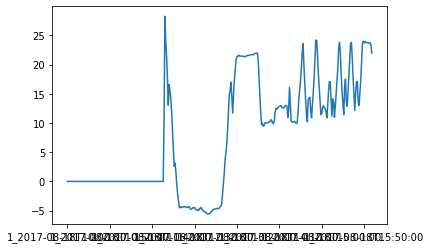

In [22]:
import matplotlib.pyplot as plt
df['AverageTemperature_ObservationSet'].plot()

In [23]:
df.head()

,AverageMassBCacc_ObservationSet,AveragePressure_ObservationSet,AverageTemperature_ObservationSet
1_2017-08-18T10:00:00,0.0,0.0,0.0
1_2017-08-18T10:01:00,0.0,0.0,0.0
1_2017-08-18T10:02:00,0.0,0.0,0.0
1_2017-08-18T10:03:00,0.0,0.0,0.0
1_2017-08-18T10:04:00,0.0,0.0,0.0


In [24]:
df.tail()

,AverageMassBCacc_ObservationSet,AveragePressure_ObservationSet,AverageTemperature_ObservationSet
1_2017-08-18T15:55:00,385.900879,1005.399740,23.739323
1_2017-08-18T15:56:00,401.977214,1004.818620,23.691797
1_2017-08-18T15:57:00,446.823242,1004.375781,23.715365
1_2017-08-18T15:58:00,435.102214,999.853776,23.412109
1_2017-08-18T15:59:00,423.974609,982.601172,21.980859


1.1822944851615695


Text(0, 0.5, 'Num. of ensemble members')

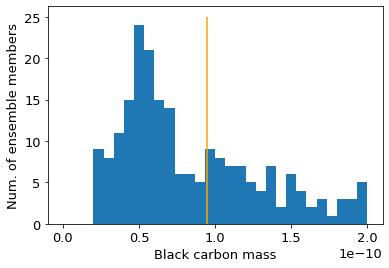

In [32]:
hist_array,bins,patches=plt.hist(np.array(ens_results)[:,260],bins=30,range=(0,2e-10)) #unit is kg/kg
df['obs_air_density_kgm-3'] = 0.029*100*df['AveragePressure_ObservationSet']/(8.314*(273.15+df['AverageTemperature_ObservationSet']))
print(np.max(df['obs_air_density_kgm-3']))
plt.rcParams.update({'font.size': 13})
plt.vlines(1e-12*np.asarray(df['AverageMassBCacc_ObservationSet']/df['obs_air_density_kgm-3'])[260], 0,25, color='orange')#units of massBCacc are ng/m3
plt.xlabel('Black carbon mass')
plt.ylabel('Num. of ensemble members')
